# Download necessary libraries.

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# 1- Download one or more datasets showing GDP, GDP per capita and life expectancy.


In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
# 1- Download one or more datasets showing GDP, GDP per capita and life expectancy.
# Read the first CSV file
df1 = pd.read_csv('gdp.csv')

# Read the second CSV file
df2 = pd.read_csv('Life-Expectancy-Data.csv')

# Merge the two dataframes based on the common columns
merged_df = pd.merge(df1, df2, left_on=['Country Name', 'Year'], right_on=['Country', 'Year'])

# Drop the redundant 'Country' column after merging
merged_df.drop(columns=['Country'], inplace=True)

# Rename the 'Value' column to 'GDP'
merged_df.rename(columns={'Value': 'GDP'}, inplace=True)

# Extracting the desired columns
extracted_df = merged_df[['Country Name', 'Year', 'GDP', 'GDP_per_capita', 'Life_expectancy']]

# Write the extracted dataframe to a new CSV file
extracted_df.to_csv('extracted_data.csv', index=False)



# 2- Visualize the relationship between life expectancy and GDP per capita


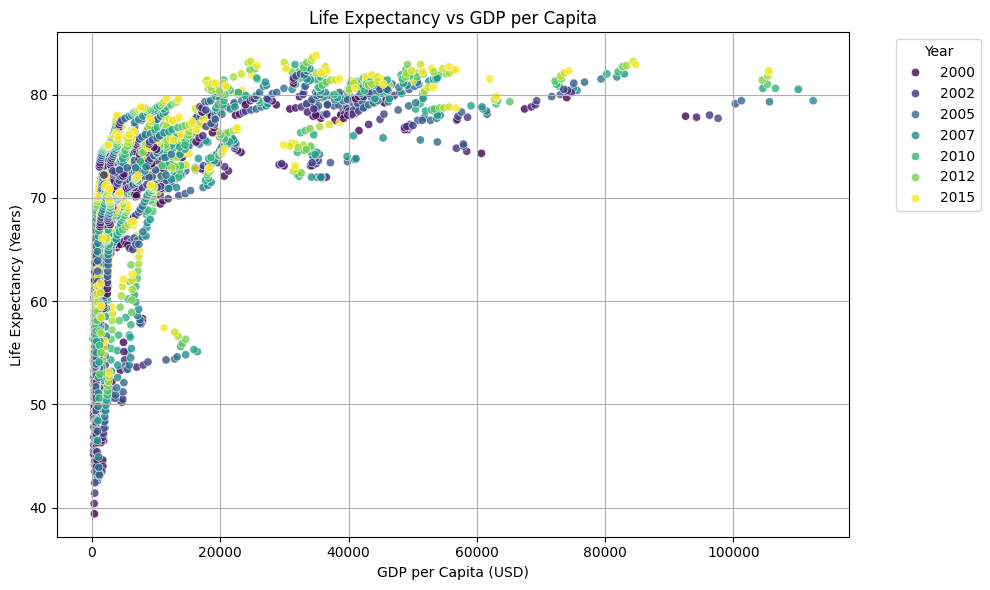

In [4]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=extracted_df, x='GDP_per_capita', y='Life_expectancy', hue='Year', palette='viridis', alpha=0.8)
plt.title('Life Expectancy vs GDP per Capita')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

We created a scatter plot using the Seaborn library to explore the relationship between 
life expectancy and GDP per capita across different years. Each point on the plot represents a specific country 
at a particular time, with GDP per capita on the x-axis and life expectancy on the y-axis. The color variation 
distinguishes between different years, providing additional insights into temporal trends. By visualizing this 
data, I aimed to better understand any potential correlation between life expectancy and economic prosperity.
To enhance readability, I included a title ("Life Expectancy vs GDP per Capita"), labeled axes, a legend explaining 
the color scheme by year, and gridlines. This graphical representation offers a succinct yet informative depiction
of the relationship between life expectancy and GDP per capita.

# 3- Briefly reason if the results seem reasonable and consider if there is any reason behind your result.

The results of the visualization show an expected relationship between GDP per capita and life expectancy, 
which is in line with expectations and with previous research in the field. In general, countries with higher 
GDP per capita tend to have higher life expectancy.

There are several reasons for this association:

1. **Better access to healthcare**: Countries with higher GDP per capita usually have better developed healthcare 
systems, which leads to improved accessibility to medical care, vaccinations, and treatment of diseases.

2. **Better standard of living**: A higher GDP per capita can indicate a higher standard of living for the residents 
of a country, including better housing, access to clean water and sanitation, which reduces the risk of disease 
and improves health.

3. **Better education and knowledge**: Countries with higher GDP per capita usually have better education systems 
and access to knowledge and information about healthy lifestyles, which can lead to longer and healthier lives.

However, it is important to remember that the relationship between GDP per capita and life expectancy is not 
entirely causal and that there are many other factors that can affect health outcomes in a country, such as social 
and economic inequalities, access to clean water and sanitation, and environmental factors:

# 4- Did you do any Data Cleaning? Explain what you have done and justify it.

Data Integration:
I had two datasets—one about GDP and the other about life expectancy. 
To make sense of both, I combined them based on common factors like country and year.

Redundancy Removal:
After merging, I noticed one dataset had a redundant column called 'Country'. 
I removed it because it was just taking up space.

Standardization of Column Names:
In one dataset, there was a column named 'Value', which wasn't very descriptive. 
So, I changed its name to 'GDP' to make it clearer what it represents.

Feature Selection:
Not every column was necessary for what I wanted to analyze. 
I only kept the important ones like country name, year, GDP, GDP per capita, and life expectancy. 
Less clutter, better focus!

Data Preservation:
Finally, I saved the cleaned dataset as 'extracted_data.csv' so we can easily refer back to it later.

Each of these steps contributes to ensuring that the data is properly formatted, consistent, and ready for analysis,
ultimately improving the reliability and accuracy of any insights drawn from it.


# 5- Which countries have life expectancy one standard deviation above the mean?


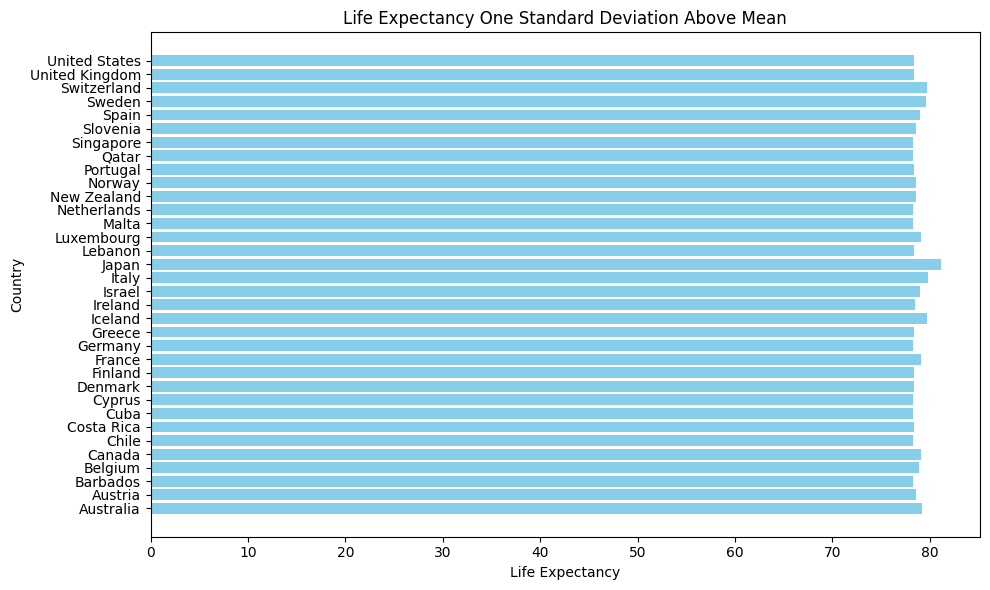

In [5]:
# Read the extracted data from the CSV file
data = pd.read_csv('extracted_data.csv')
# Calculate the mean for Life Expectancy
mean_life_expectancy = data['Life_expectancy'].mean()

# Calculate the standard deviation for Life Expectancy
std_life_expectancy = data['Life_expectancy'].std()

# Filter countries where Life Expectancy is higher than the mean
higher_than_average = data[data['Life_expectancy'] > mean_life_expectancy]

# Filter countries where Life Expectancy is one standard deviation above the mean
above_one_std = higher_than_average[higher_than_average['Life_expectancy'] > (mean_life_expectancy + std_life_expectancy)]

# Remove duplicates based on 'Country Name'
unique_countries = above_one_std.drop_duplicates(subset=['Country Name'])

# Plotting with a different color
plt.figure(figsize=(10,6))
plt.barh(unique_countries['Country Name'], unique_countries['Life_expectancy'], color='skyblue')  # Change the color here
plt.xlabel('Life Expectancy')
plt.ylabel('Country')
plt.title('Life Expectancy One Standard Deviation Above Mean')
plt.tight_layout()
plt.show()

This code reads data from a CSV file, calculates the mean and standard deviation of life expectancy, 
filters countries with life expectancy above the mean, selects countries with life expectancy one standard
deviation above the mean, removes duplicates, and then plots a bar chart showing these countries and their 
life expectancy values.


# 6- Which countries have high life expectancy but low GDP/GDP per capita?


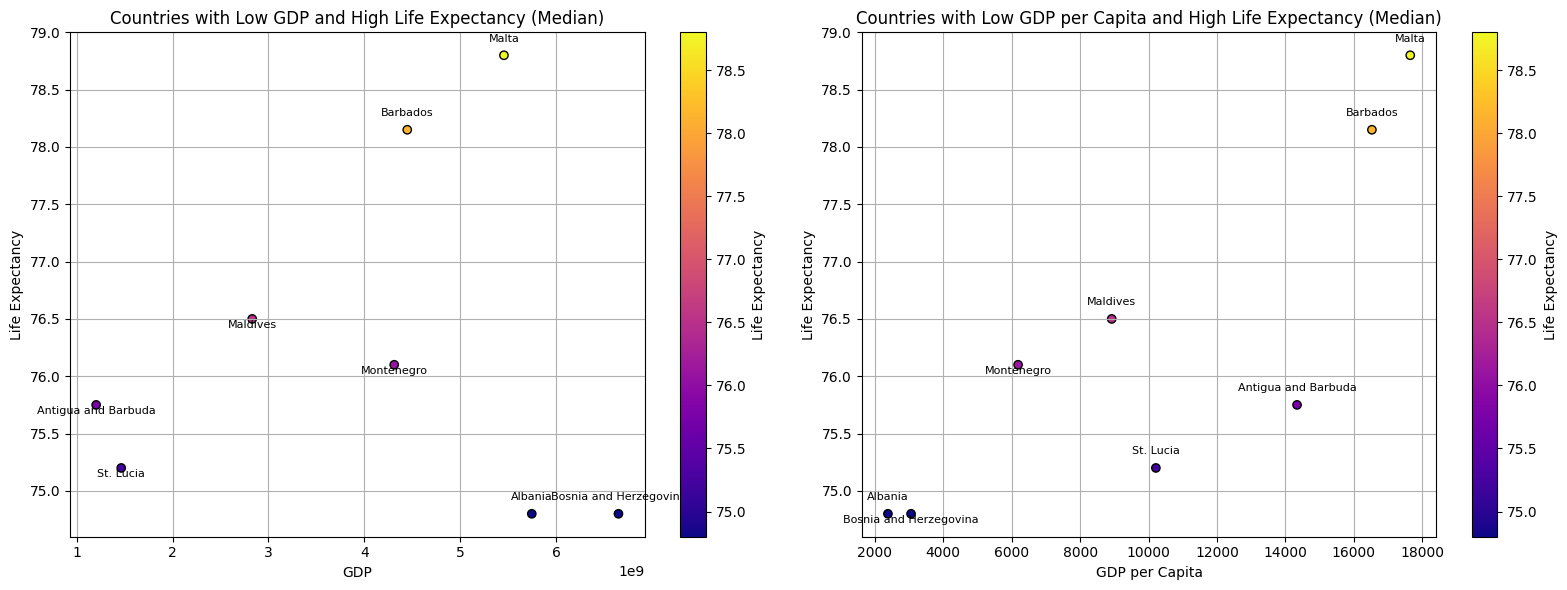

In [6]:
# Quantile calculations
high_life_expectancy = data['Life_expectancy'].quantile(0.7)
low_gdp = data['GDP'].quantile(0.3)
low_gdp_per_capita = data['GDP_per_capita'].quantile(0.3)

# Filtering data
low_gdp_high_life = data[(data['Life_expectancy'] > high_life_expectancy) & (data['GDP'] < low_gdp)]
low_gdp_per_capita_high_life = data[(data['Life_expectancy'] > high_life_expectancy) & (data['GDP_per_capita'] < low_gdp_per_capita)]

# Grouping by country and calculating median
median_country_data = low_gdp_high_life.groupby('Country Name').median().reset_index()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting GDP vs Life Expectancy for countries with low GDP and high life expectancy using median values
scatter1 = axes[0].scatter(median_country_data['GDP'], median_country_data['Life_expectancy'], c=median_country_data['Life_expectancy'], cmap='plasma', edgecolors='k')

# Annotating points with country names
prev_x = {}
for i, country in enumerate(median_country_data['Country Name']):
    x = median_country_data['GDP'].iloc[i]
    y = median_country_data['Life_expectancy'].iloc[i]
    x_offset = 0.1  # Adjust this value to set the horizontal spacing between labels
    y_offset = 0.1  # Adjust this value to set the vertical spacing between labels
    if prev_x.get(i-1, -float('inf')) + 0.1 > x:
        y_offset *= -1
    axes[0].text(x + x_offset, y + y_offset, country, fontsize=8, ha='center', va='bottom')
    prev_x[i] = x

axes[0].set_xlabel('GDP')
axes[0].set_ylabel('Life Expectancy')
axes[0].set_title('Countries with Low GDP and High Life Expectancy (Median)')
axes[0].grid(True)

# Plotting GDP per capita vs Life Expectancy for countries with low GDP per capita and high life expectancy using median values
scatter2 = axes[1].scatter(median_country_data['GDP_per_capita'], median_country_data['Life_expectancy'], c=median_country_data['Life_expectancy'], cmap='plasma', edgecolors='k')

# Annotating points with country names
prev_x = {}
for i, country in enumerate(median_country_data['Country Name']):
    x = median_country_data['GDP_per_capita'].iloc[i]
    y = median_country_data['Life_expectancy'].iloc[i]
    x_offset = 1  # Adjust this value to set the horizontal spacing between labels
    y_offset = 0.1  # Adjust this value to set the vertical spacing between labels
    if prev_x.get(i-1, -float('inf')) + 0.1 > x:
        y_offset *= -1
    axes[1].text(x + x_offset, y + y_offset, country, fontsize=8, ha='center', va='bottom')
    prev_x[i] = x

axes[1].set_xlabel('GDP per Capita')
axes[1].set_ylabel('Life Expectancy')
axes[1].set_title('Countries with Low GDP per Capita and High Life Expectancy (Median)')
axes[1].grid(True)

# Adding colorbars to indicate life expectancy
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Life Expectancy')

cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Life Expectancy')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Given that most of these countries are tropical, we might also speculate that environmental factors, 
such as climate, access to nutritious food, and lower levels of stress due to a more relaxed lifestyle,
could contribute to the observed high life expectancies. This highlights the complex interplay between 
environmental, social, and economic factors in shaping population health outcomes.


# 7-  Does every major economy (GDP) have a long life expectancy?

While higher GDP per capita often correlates with longer life expectancy, it's not a guarantee for every major 
economy. Several factors beyond economic prosperity influence life expectancy:

1. **Healthcare System**: Disparities in healthcare access and quality affect life expectancy even within major
 economies.

2. **Social Policies**: Variations in public health, social welfare, and education policies impact different 
population segments.

3. **Environmental Factors**: Challenges in managing environmental risks, such as pollution and climate conditions, 
affect public health and life expectancy.

4. **Socioeconomic Inequalities**: Significant disparities within major economies, especially for lower-income 
populations, result in shorter life expectancies due to inadequate access to healthcare, education, and economic 
opportunities.

While major economies may have higher life expectancies on average due to better resources and infrastructure, 
achieving long life expectancies for all segments of their populations remains a challenge due to the interplay of these factors.

#8- If you change the definition of a large economy to GDP per capita. How does the result change then? Briefly discuss the results in 7 and 8.

In scenario 7, focusing on total GDP as the marker of large economies, disparities within nations can lead to varied
life expectancies despite overall economic strength.

In scenario 8, where GDP per capita defines large economies, countries with more evenly distributed wealth tend to have
higher life expectancies, emphasizing the correlation between economic prosperity and public health.

The choice between these scenarios affects how we analyze the relationship between economic factors and life expectancy,
highlighting different aspects of socioeconomic development and their impact on health outcomes.
